In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import h5py
import json
import pickle
import glob
import itertools
import pandas as pd
# from utils.plot_util import *
import socket
import os

# Loading files

In [2]:
hostname = socket.gethostname()
if hostname == 'HAITI' or 'Gorleben':
    DIR = "C:/Users/xin/OneDrive - bwstaff/xin/trelleborg"
    DATASET = "D:/xin/datasets/Trelleborg/V27/*.h5"
if hostname == 'BALI':
    DIR = "/home/xin/projects/trelleborg"
    DATASET = "/storage/xin/datasets/Trelleborg/V27/*.h5"
if hostname == 'LAPTOP-1FOJITEG':
    DIR = "C:/Users/xinch/OneDrive - bwstaff/xin/trelleborg"
    DATASET = "C:/LINHC/VersucheDBs/Trelleborg/V27/*.h5"
DIR = os.path.abspath(DIR)
DATASET = os.path.abspath(DATASET)

file_list = []
for file in glob.glob(DATASET):
    file_list.append(file)
file_list = sorted(file_list)
file_list_LEM1 = [file for file in file_list if 'LEM1' in file]
file_list_LEM1

['D:\\xin\\datasets\\Trelleborg\\V27\\V27-100bar_LEM1.h5',
 'D:\\xin\\datasets\\Trelleborg\\V27\\V27-200bar_LEM1.h5',
 'D:\\xin\\datasets\\Trelleborg\\V27\\V27-30bar_LEM1.h5']

In [3]:
def load_and_plot(num):
    file = file_list_LEM1[num]
    filename = file.split(os.sep)[-1][:-3]
    h51 = h5py.File(file, "r")
    print("file:",filename)
    print("\nATTR:")
    print(h51.attrs.keys())
    print("\nKeys:")
    print(h51.keys())
    
#     # print look up dictionary
#     json_object = json.loads(h51.attrs["name_lookup"])
#     json_formatted_str = json.dumps(json_object, indent=2)
#     print("\nLOOKUP:")
#     print(json_formatted_str)
    
    # plot of speed, isp and temperature
    fidx = 20
    %matplotlib inline
    plt.figure(figsize=(10,8))
    plt.plot(h51['spd1'],label='speed (negative)')
    plt.plot(h51['ip1k1'],label='intermidiate seal pressure')
    plt.plot(h51['k1t'],label='temperature')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

file: V27-100bar_LEM1

ATTR:
<KeysViewHDF5 ['name_lookup', 'name_rev_lookup']>

Keys:
<KeysViewHDF5 ['S11_LEM1', 'S21_P1_LEM1', 'S21_P2_LEM1', 'S22_LEM1', 'hub1', 'hub2', 'ip1k1', 'ip1k2', 'ip2k1', 'ip2k2', 'k1at', 'k1f', 'k1p', 'k1t', 'k2at', 'k2f', 'k2p', 'k2t', 'phi', 'pos1', 'pos2', 'shub1', 'shub2', 'sk1at', 'sk1f', 'sk1p', 'sk1t', 'sk2at', 'sk2f', 'sk2p', 'sk2t', 'spd1', 'spd2', 'sphi', 'spos1', 'spos2', 'sspd1', 'sspd2', 'stdf', 't', 'tdf']>


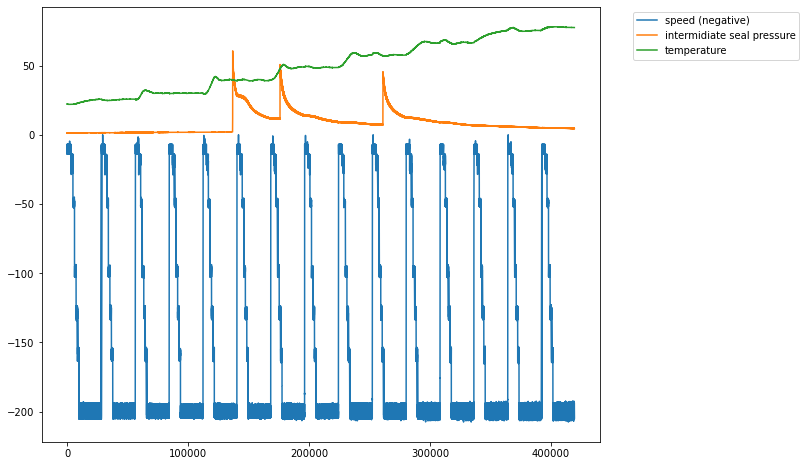

In [4]:
load_and_plot(0)

file: V27-200bar_LEM1

ATTR:
<KeysViewHDF5 ['name_lookup', 'name_rev_lookup']>

Keys:
<KeysViewHDF5 ['S11_LEM1', 'S21_P1_LEM1', 'S21_P2_LEM1', 'S22_LEM1', 'hub1', 'hub2', 'ip1k1', 'ip1k2', 'ip2k1', 'ip2k2', 'k1at', 'k1f', 'k1p', 'k1t', 'k2at', 'k2f', 'k2p', 'k2t', 'phi', 'pos1', 'pos2', 'shub1', 'shub2', 'sk1at', 'sk1f', 'sk1p', 'sk1t', 'sk2at', 'sk2f', 'sk2p', 'sk2t', 'spd1', 'spd2', 'sphi', 'spos1', 'spos2', 'sspd1', 'sspd2', 'stdf', 't', 'tdf']>


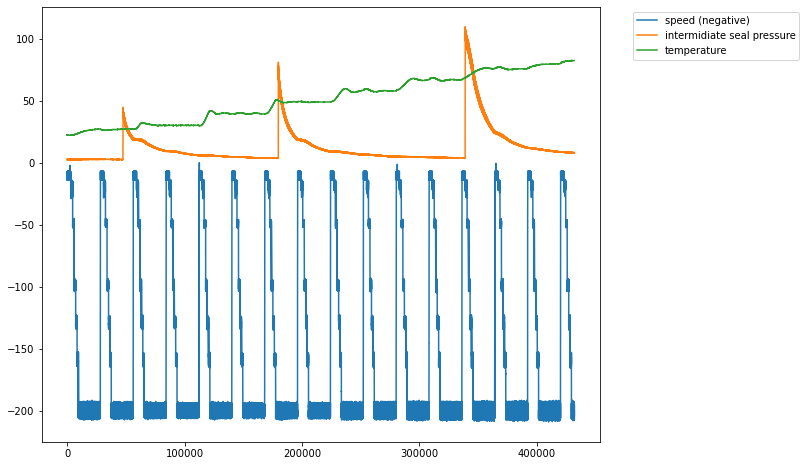

In [5]:
load_and_plot(1)

file: V27-30bar_LEM1

ATTR:
<KeysViewHDF5 ['name_lookup', 'name_rev_lookup']>

Keys:
<KeysViewHDF5 ['S11_LEM1', 'S21_P1_LEM1', 'S21_P2_LEM1', 'S22_LEM1', 'hub1', 'hub2', 'ip1k1', 'ip1k2', 'ip2k1', 'ip2k2', 'k1at', 'k1f', 'k1p', 'k1t', 'k2at', 'k2f', 'k2p', 'k2t', 'phi', 'pos1', 'pos2', 'shub1', 'shub2', 'sk1at', 'sk1f', 'sk1p', 'sk1t', 'sk2at', 'sk2f', 'sk2p', 'sk2t', 'spd1', 'spd2', 'sphi', 'spos1', 'spos2', 'sspd1', 'sspd2', 'stdf', 't', 'tdf']>


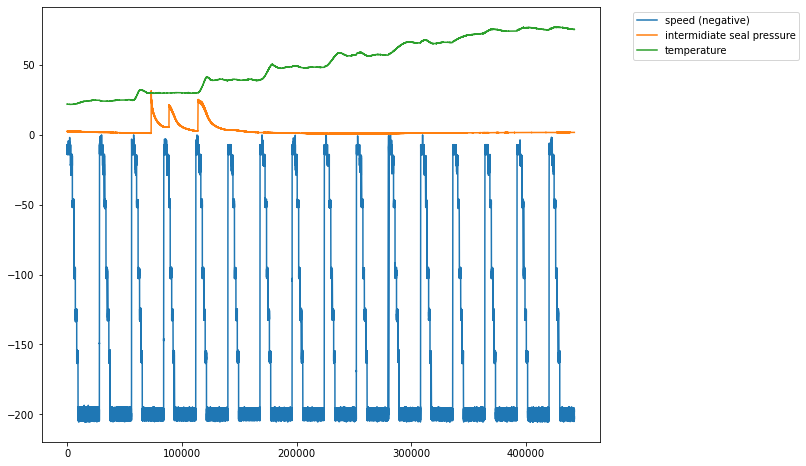

In [6]:
load_and_plot(2)

In [7]:
file = file_list_LEM1[1] # 200 bar as an example
filename = file.split(os.sep)[-1][:-3]

pklName = DIR + '/data/V27/shift_opts_freqs_all/' + filename + '.pkl'
shift_opts_freqs_all = pickle.load(open(pklName, 'rb')) 

h51 = h5py.File(file, "r")
json.loads(h51.attrs["name_lookup"])

{'Ist-Ablauf-Zeit, ca.': 't',
 'Ist-MG1: Teller-Drehfrequenz [Hz]': 'tdf',
 'Soll-MG1: Teller-Drehfrequenz [Hz]': 'stdf',
 'Ist-MG2: Kammer1-Temp[°C]': 'k1t',
 'Soll-MG2: Kammer1-Temp[°C]': 'sk1t',
 'Ist-MG3: Kammer1-Druck[bar]': 'k1p',
 'Soll-MG3: Kammer1-Druck[bar]': 'sk1p',
 'Ist-MG4: Kammer2-Temp.[°C]': 'k2t',
 'Soll-MG4: Kammer2-Temp.[°C]': 'sk2t',
 'Ist-MG5: Kammer2-Druck[bar]': 'k2p',
 'Soll-MG5: Kammer2-Druck[bar]': 'sk2p',
 'Ist-MG6: Kammer1-Kraft[kN]': 'k1f',
 'Soll-MG6: Kammer1-Kraft[kN]': 'sk1f',
 'Ist-MG7: Kammer2-Kraft[kN]': 'k2f',
 'Soll-MG7: Kammer2-Kraft[kN]': 'sk2f',
 'Ist-MG8: Kammer1-Außentemp.[°C]': 'k1at',
 'Soll-MG8: Kammer1-Außentemp.[°C]': 'sk1at',
 'Ist-MG9: Kammer2-Außentemp.[°C]': 'k2at',
 'Soll-MG9: Kammer2-Außentemp.[°C]': 'sk2at',
 'Ist-MG10: Kammer1-Istpos.[mm]': 'pos1',
 'Soll-MG10: Kammer1-Istpos.[mm]': 'spos1',
 'Ist-MG11: Kammer2-Istpos.[mm]': 'pos2',
 'Soll-MG11: Kammer2-Istpos.[mm]': 'spos2',
 'Ist-MG12: Hub1[mm]': 'hub1',
 'Soll-MG12: Hub1[mm]': '

In [8]:
print(filename)
print(shift_opts_freqs_all.shape)

V27-200bar_LEM1
(121, 431930)


## lsa

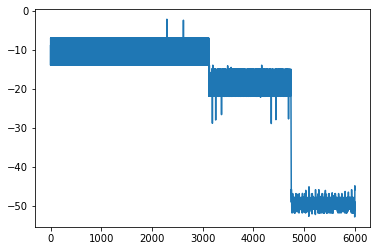

In [9]:
plt.plot(h51['spd1'][:6000])

In [10]:
low = np.where(h51['spd1'][:]>-40)[0]
pos_low = h51['pos1'][low]
low_sep = np.where(np.diff(low)>3000)[0] # check if 3000 fit for all datasets
pos_low_sep = np.split(pos_low,low_sep+1)
Ls = np.append(low[low_sep],low[-1])
print("timestamps of Ls:")
print (Ls)

Fs = np.append(low[0],low[low_sep+1])
print("timestamps of Fs:")
print (Fs)

print("Durations of lsa:\n",Ls-Fs)

timestamps of Ls:
[  4743  32732  60721  88710 116696 144683 172674 200664 228651 256639
 284625 312612 340597 368587 396572 424559]
timestamps of Fs:
[     0  28336  56326  84315 112303 140291 168277 196268 224257 252245
 280233 308218 336205 364191 392181 420166]
Durations of lsa:
 [4743 4396 4395 4395 4393 4392 4397 4396 4394 4394 4392 4394 4392 4396
 4391 4393]


## End Stroke 

not sure max pos1 corresponds to end stroke retracted or extended

so extract both max pos1 (end_pXX) and min pos1 (endn_nXX)

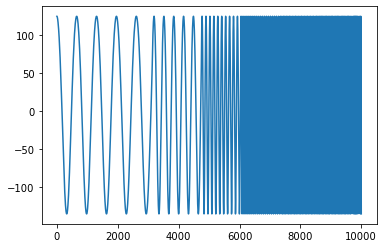

In [11]:
plt.plot(h51['pos1'][:10000])

In [12]:
#  positions bigger or smaller than 100 or 10 mm
p100 = np.where(h51['pos1'][:]>100)[0]
p10 = np.where(h51['pos1'][:]>10)[0]
n100 = np.where(h51['pos1'][:]<-100)[0]
n10 = np.where(h51['pos1'][:]<-10)[0]

#  positions within in or outside absolute value 100 or 10 mm
pos_in_100 = np.array(list(set(np.arange(h51['pos1'].shape[0]))-(set(p100)|set(n100))))
pos_out_100 =  np.sort(np.concatenate((p100,n100)))
pos_in_10 = np.array(list(set(np.arange(h51['pos1'].shape[0]))-(set(p10)|set(n10))))
pos_out_10 =  np.sort(np.concatenate((p10,n10)))

## EDA

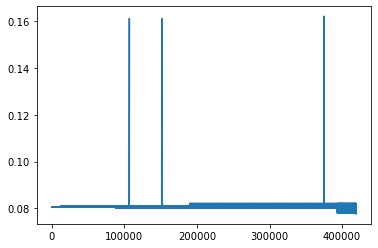

In [28]:
plt.plot(np.diff(h51['t']))

In [28]:
# time interval in ms
121*2/3

80.66666666666667

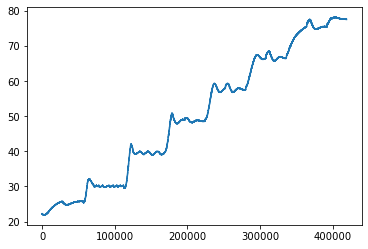

In [29]:
%matplotlib inline
plt.plot(h51['k1t'])

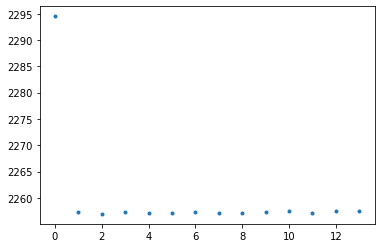

In [31]:
%matplotlib inline
plt.plot(np.diff(h51['t'][Fs]),'.')

In [32]:
%matplotlib inline
plt.plot(np.diff(shift_opts_freqs[0]),'.')

NameError: name 'shift_opts_freqs' is not defined

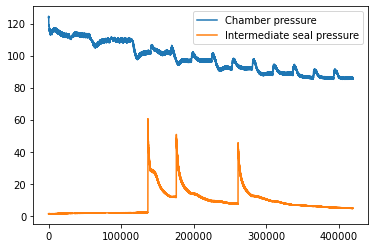

In [33]:
%matplotlib inline
plt.plot(h51['k1p'],label = 'Chamber pressure')
plt.plot(h51['ip1k1'],label = 'Intermediate seal pressure')
plt.legend()

In [34]:
np.diff(h51['t']).min()

0.07760127999790711

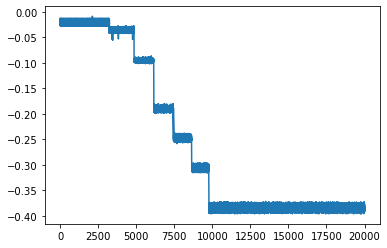

In [35]:
plt.plot(h51['tdf'][:20000])

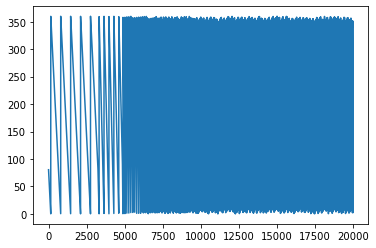

In [36]:
plt.plot(h51['phi'][:20000])

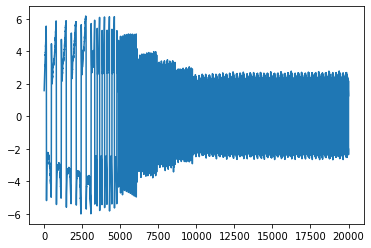

In [37]:
plt.plot(h51['k1f'][:20000])

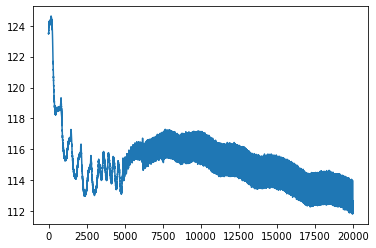

In [38]:
plt.plot(h51['k1p'][:20000])

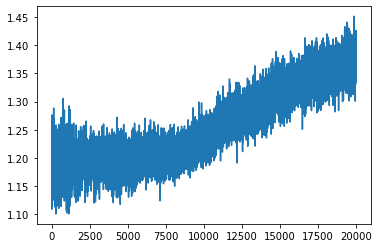

In [39]:
plt.plot(h51['ip1k1'][:20000])

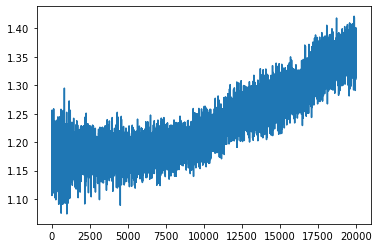

In [40]:
plt.plot(h51['ip2k1'][:20000])

## Plot and save

In [ ]:
# Plot and save ip1k1
folder = DIR + '/data/pics/ip1k1/'
Path(folder).mkdir(parents=True, exist_ok=True)
for file in file_list:
    filename = file.split(os.sep)[-1][:-3]
    with h5py.File(file, "r") as h51:
        plt.figure()
        plt.plot(h51['ip1k1'])
        plt.savefig(folder + filename,facecolor='w')

In [ ]:
# Plot and save ip1k2
folder = DIR + '/data/pics/ip1k2/'
Path(folder).mkdir(parents=True, exist_ok=True)
for file in file_list:
    filename = file.split(os.sep)[-1][:-3]
    with h5py.File(file, "r") as h51:
        plt.figure()
        plt.plot(h51['ip1k2'])
        plt.savefig(folder + filename,facecolor='w')

In [ ]:
# Plot and save first 50000 spd and ip1k1 points in one figure
folder = DIR + '/data/pics/spd_ip1k1/'
Path(folder).mkdir(parents=True, exist_ok=True)
for file in file_list:
    filename = file.split(os.sep)[-1][:-3]
    with h5py.File(file, "r") as h51:
        plt.figure()
        plt.plot(h51['spd1'][:50000], label = 'spd')
        plt.plot(h51['ip1k1'][:50000], label = 'ip1k1')
        plt.legend()
        plt.savefig(folder + filename,facecolor='w')


In [ ]:
# Plot and save k1p
folder = DIR + '/data/pics/k1p/'
Path(folder).mkdir(parents=True, exist_ok=True)
for file in file_list:
    filename = file.split(os.sep)[-1][:-3]
    with h5py.File(file, "r") as h51:
        plt.figure()
        plt.plot(h51['k1p'])
        plt.savefig(folder + filename,facecolor='w')

In [ ]:
# Plot and save k2p
folder = DIR + '/data/pics/k2p/'
Path(folder).mkdir(parents=True, exist_ok=True)
for file in file_list:
    filename = file.split(os.sep)[-1][:-3]
    with h5py.File(file, "r") as h51:
        plt.figure()
        plt.plot(h51['k2p'])
        plt.savefig(folder + filename,facecolor='w')

In [ ]:
# Plot and save k2p
folder = DIR + '/data/pics/k2p/'
Path(folder).mkdir(parents=True, exist_ok=True)
for file in file_list:
    filename = file.split(os.sep)[-1][:-3]
    with h5py.File(file, "r") as h51:
        plt.figure()
        plt.plot(h51['k2p'])
        plt.savefig(folder + filename,facecolor='w')

In [ ]:
# Plot and save k1t
folder = DIR + '/data/pics/k1t/'
Path(folder).mkdir(parents=True, exist_ok=True)
for file in file_list:
    filename = file.split(os.sep)[-1][:-3]
    with h5py.File(file, "r") as h51:
        plt.figure()
        plt.plot(h51['k1t'])
        plt.savefig(folder + filename,facecolor='w')

In [ ]:
# Plot and save k2t
folder = DIR + '/data/pics/k2t/'
Path(folder).mkdir(parents=True, exist_ok=True)
for file in file_list:
    filename = file.split(os.sep)[-1][:-3]
    with h5py.File(file, "r") as h51:
        plt.figure()
        plt.plot(h51['k2t'])
        plt.savefig(folder + filename,facecolor='w')

## Check


see s21 diff with same pos, spd but different temp and pressure

In [13]:
file_list_LEM1

['D:\\xin\\datasets\\Trelleborg\\V27\\V27-100bar_LEM1.h5',
 'D:\\xin\\datasets\\Trelleborg\\V27\\V27-200bar_LEM1.h5',
 'D:\\xin\\datasets\\Trelleborg\\V27\\V27-30bar_LEM1.h5']

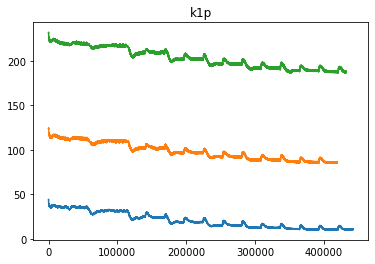

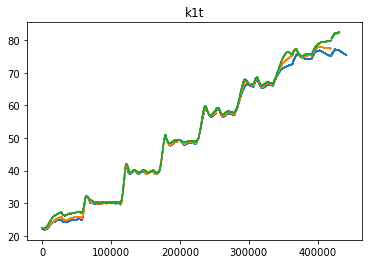

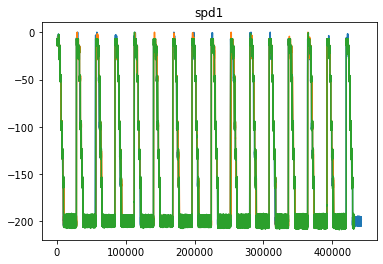

In [14]:
h5_30 = h5py.File(file_list_LEM1[2], "r")
h5_100 = h5py.File(file_list_LEM1[0], "r")
h5_200 = h5py.File(file_list_LEM1[1], "r")

def plot3(h51,h52,h53,key):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(key)
    ax.plot(h51[key])
    ax.plot(h52[key])
    ax.plot(h53[key])
plot3(h5_30,h5_100,h5_200,'k1p')
plot3(h5_30,h5_100,h5_200,'k1t')
plot3(h5_30,h5_100,h5_200,'spd1')

compare B-E and C-F due to similar temperature level

In [15]:
#  compare the data points 1.5e6~3e6 
F = int(1.5*1e5)
L = int(3*1e5)

# extract data
spd_30 = h5_30['spd1'][F:L]
spd_100 = h5_100['spd1'][F:L]
spd_200 = h5_200['spd1'][F:L]
pos_30 = h5_30['pos1'][F:L]
pos_100 = h5_100['pos1'][F:L]
pos_200 = h5_200['pos1'][F:L]

pos_200.shape

(150000,)

In [16]:
# define starting point as the first point of the first lsa
f_30 = np.where(spd_30>-20)[0][0]
f_100 = np.where(spd_100>-20)[0][0]
f_200 = np.where(spd_200>-20)[0][0]

In [17]:
# test N points starting from f_30, f_100 or f_200
N = 10000
pos_30 = pos_30[f_30:f_30+N]
pos_100 = pos_100[f_100:f_100+N]
pos_200 = pos_200[f_200:f_200+N]
spd_30 = spd_30[f_30:f_30+N]
spd_100 = spd_100[f_100:f_100+N]
spd_200 = spd_200[f_200:f_200+N]

pos_30.shape

(10000,)

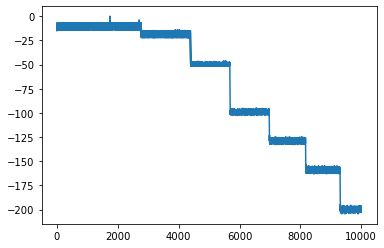

In [18]:
plt.plot(spd_30)

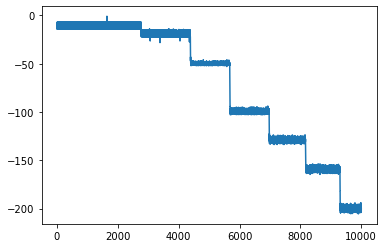

In [19]:
plt.plot(spd_100)

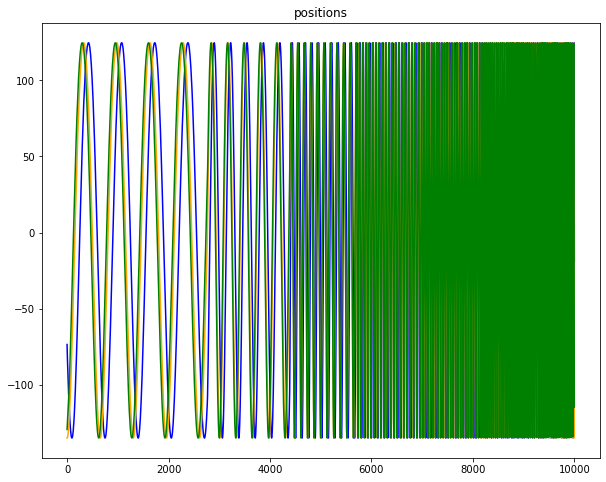

In [20]:
# compare the positions
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('positions')
ax.plot(pos_30,'blue')
ax.plot(pos_100,'orange')
ax.plot(pos_200,'green')

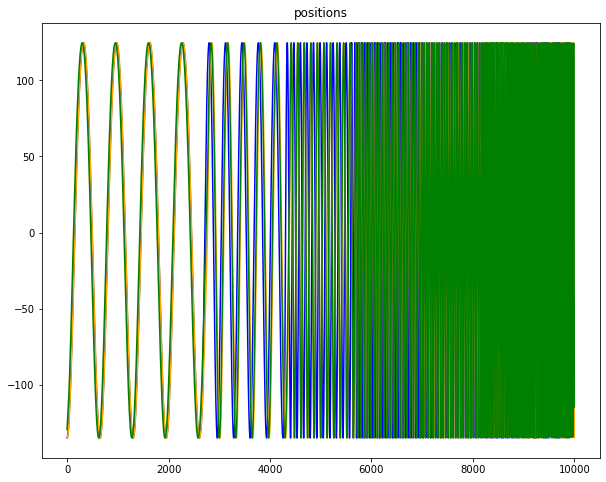

In [21]:
# compare the positions
shfit_p = 100
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('positions')
ax.plot(pos_30[shfit_p:],'blue')
ax.plot(pos_100,'orange')
ax.plot(pos_200,'green')

In [22]:
# Error after shift: big speed error
print("Mean Error of positions in mm:", np.mean(pos_30[shfit_p:] - pos_200[:-shfit_p]))
print("Mean Error of speeds in mm/s:",np.mean(spd_30[shfit_p:] - spd_200[:-shfit_p]))

Mean Error of positions in mm: 0.0018965058947881313
Mean Error of speeds in mm/s: -1.9296363421879594


In [23]:
# Error without shift: big position error,because the original extraction is based on speed
# for simplicity, just use the version without shift
# but only compare the first 2000 points
print("Mean Error of positions in mm:", np.mean(pos_30 - pos_200))
print("Mean Error of speeds in mm/s:",np.mean(spd_30 - spd_200))

Mean Error of positions in mm: -1.134790072812801
Mean Error of speeds in mm/s: -0.0036286637337598505


In [24]:
print("Mean Error of positions in mm:", np.mean(pos_100 - pos_200))
print("Mean Error of speeds in mm/s:",np.mean(spd_100 - spd_200))

Mean Error of positions in mm: -0.5515782632832001
Mean Error of speeds in mm/s: -0.042988301528319894


In [25]:
# extract s21, ignore time sync cause only one lsa is extracted
s21_30 = np.array(h5_30['S21_P1_LEM1'][F+f_30:F+f_30+N,:])
s21_100 = np.array(h5_100['S21_P1_LEM1'][F+f_100:F+f_100+N,:])
s21_200 = np.array(h5_200['S21_P1_LEM1'][F+f_200:F+f_200+N,:])
s21_100.shape

(10000, 121)

In [26]:
# as standard
abs(s21_200[:1000,20]).argsort()[-10:][::-1]

array([773, 774, 363, 772, 120, 364, 775, 362, 121, 361], dtype=int64)

In [27]:
abs(s21_30[:1000,20]).argsort()[-10:][::-1]

array([473, 474, 475, 885, 232, 472, 886, 233, 884, 231], dtype=int64)

In [28]:
abs(s21_100[:1000,20]).argsort()[-10:][::-1]

array([144, 145, 143, 146, 797, 798, 147, 386, 387, 799], dtype=int64)

after comparison we can confirm that

shift1 between s21_200 ands 21_30  should be around 24 (=144-120)

shift2 between s21_200s and 21_100 should be around 110 (=473-363)


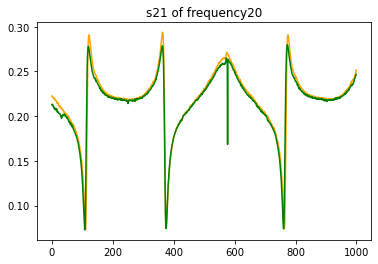

In [29]:
# plot of s21
shift1 = 110
fig = plt.figure()
freq = 20
ax = fig.add_subplot(1, 1, 1)
ax.set_title('s21 of frequency'+str(freq))
ax.plot(abs(s21_30[shift1:1000+shift1,freq]),'orange') # time shift needed
ax.plot(abs(s21_200[:1000,freq]),'green')

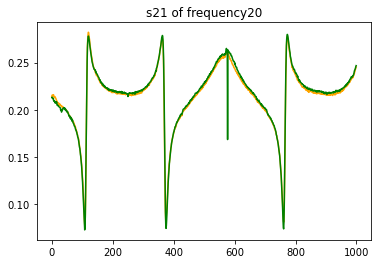

In [30]:
# plot of s21

shift2 = 24
fig = plt.figure()
freq = 20
ax = fig.add_subplot(1, 1, 1)
ax.set_title('s21 of frequency'+str(freq))
ax.plot(abs(s21_100[shift2:1000+shift2,freq]),'orange') # time shift needed
ax.plot(abs(s21_200[:1000,freq]),'green')

In [31]:
NN = 6000

_s21_30 = s21_30[shift1:NN+shift1,:]
_s21_100 = s21_100[shift2:NN+shift2,:]
_s21_200 = s21_200[:NN,:]
_s21_200.shape

(6000, 121)

### Evaluation based on relative error

In [32]:
# result dictionary
d = {
    "abs":[np.mean(abs(_s21_30)),np.mean(abs(_s21_100)),np.mean(abs(_s21_200))],
}
d["mae"] = [abs(np.mean(abs(_s21_30 -_s21_200))),
            abs(np.mean(abs(_s21_100 -_s21_200)))
            ,0]
d["re"] = [d["mae"][0]/d["abs"][2],
           d["mae"][1]/d["abs"][2],
           0]
pd.DataFrame.from_dict(d, orient='index',
                       columns=['30bar', '100bar', '200bar'])

,30bar,100bar,200bar
abs,0.183147,0.183442,0.183243
mae,0.055378,0.042631,0.000000
re,0.302213,0.232649,0.000000


In [ ]:
# result dictionary
d = {
    "abs":[np.mean(abs(_s21_30)),np.mean(abs(_s21_100)),np.mean(abs(_s21_200))],
}
d["mae"] = [abs(np.mean(abs(_s21_30 -_s21_200))),
            abs(np.mean(abs(_s21_100 -_s21_200)))
            ,0]
d["re"] = [d["mae"][0]/d["abs"][2],
           d["mae"][1]/d["abs"][2],
           0]
pd.DataFrame.from_dict(d, orient='index',
                       columns=['30bar', '100bar', '200bar'])

### Evaluation based on MAPE

In [41]:
# real and imag parts of a complex are seperated and even not adjacent!
# but that's enough for the calculation of mae and mape

dataset_p30 = []
for j in range (121):
    dataset_p30.append(_s21_30[:,j].real)
    dataset_p30.append(_s21_30[:,j].imag)
_s21_30_242 = np.array(dataset_p30).T

dataset_p100 = []
for j in range (121):
    dataset_p100.append(_s21_100[:,j].real)
    dataset_p100.append(_s21_100[:,j].imag)
_s21_100_242 = np.array(dataset_p100).T

dataset_p200 = []
for j in range (121):
    dataset_p200.append(_s21_200[:,j].real)
    dataset_p200.append(_s21_200[:,j].imag)
_s21_200_242 = np.array(dataset_p200).T


In [50]:
# Evaluation before autoencoder
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

_s21_200_242= _s21_200_242.flatten()
_s21_100_242= _s21_100_242.flatten()
_s21_30_242= _s21_30_242.flatten()

ind = np.where(np.logical_and(_s21_200_242>=-1e-7, _s21_200_242<=1e-7))[0]
_s21_200_242[ind] = 1e-7 # Prevent division by zero 

d2 = {
    "abs":[np.mean(abs(_s21_30)),np.mean(abs(_s21_100)),np.mean(abs(_s21_200))],
    
    "mae":[
        mean_absolute_error(_s21_200_242,_s21_30_242),
        mean_absolute_error(_s21_200_242,_s21_100_242),
        0
    ],
    
    "mape":[
        mean_absolute_percentage_error(_s21_200_242,_s21_30_242),
        mean_absolute_percentage_error(_s21_200_242,_s21_100_242),
        0
    ]
}

pd.DataFrame.from_dict(d2, orient='index',
                       columns=['30bar', '100bar', '200bar'])

,30bar,100bar,200bar
abs,0.183147,0.183442,0.183243
mae,0.035335,0.027175,0.000000
mape,24.094334,18.572403,0.000000


#### Conclusion

Relative Differences betwwen s21s in different pressure are big:

30 bar vs 200 bar: >30%

100 bar vs 200 bar: >23%


In [48]:
np.where(np.logical_and(_s21_200_242.flatten()>=-1e-7, _s21_200_242.flatten()<=1e-7))[0]

array([   4687,   14040,   30533,   35013,   59462,   62850,   68016,
        109187,  111234,  115929,  122783,  124347,  127938,  129294,
        129559,  133408,  134034,  140031,  142209,  156582,  157037,
        163879,  189641,  202251,  226042,  229097,  250414,  297000,
        297242,  316258,  330966,  352381,  379194,  386397,  394666,
        402863,  415686,  453550,  456364,  460939,  466317,  503315,
        522713,  532572,  535539,  544665,  574090,  590917,  590940,
        603879,  637201,  653517,  679973,  691092,  715683,  725224,
        735479,  735646,  750457,  754002,  802725,  805421,  806037,
        809978,  819754,  822981,  831442,  842341,  854928,  857737,
        869458,  883587,  909451,  913731,  940109,  944350,  980076,
       1008881, 1010120, 1022516, 1028913, 1044718, 1060867, 1063847,
       1086026, 1107126, 1110026, 1142412, 1175297, 1198098, 1199199,
       1220562, 1220693, 1221561, 1230901, 1230994, 1258110, 1300212,
       1313056, 1313

In [47]:
_s21_200_242.flatten()

array([ 0.04837036,  0.08279419,  0.07901001, ...,  0.08190918,
        0.10119629, -0.08335876], dtype=float32)

In [49]:
_s21_200_242.flatten()[4687]

0.0